In [2]:
!pip install pandas seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 3.7 MB/s eta 0:00:007.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 4.1 MB/s eta 0:00:005.0 MB/s eta 0:00:01


In [75]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [61]:
zomato=pd.read_csv("./zomato.csv")

In [62]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [63]:
#deleting  Unnnecessary Columns
zomato=zomato.drop(['url','dish_liked','phone'],axis=1) 

In [64]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [65]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()
# print(list(zomato['location'].unique()))
# print(list(zomato['rest_type'].unique()))
print(list(zomato['cuisines'].unique()))


<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43499 n

In [66]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [67]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [68]:
#Removing '/5' from Rates
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

<ipython-input-68-011ea27cbfdf>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [89]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()
print(zomato.head())

                                             address                   name   
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa  \
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table  rate  votes      location            rest_type   
0          True        True   4.1    775  Banashankari        Casual Dining  \
1          True       False   4.1    787  Banashankari        Casual Dining   
2          True       False   3.8    918  Banashankari  Cafe, Casual Dining   
3         False       False   3.7     88  Banashankari          Quick Bites   
4         False       False   3.8    166  Basavanagudi        Casual Dining   

                         cuisines   cost   
0  Nor

In [90]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
print(zomato_en.head())

   address  name  online_order  book_table  rate  votes  location  rest_type   
0        0     0             0           0   4.1    775         0          0  \
1        1     1             0           1   4.1    787         0          0   
2        2     2             0           1   3.8    918         0          1   
3        3     3             1           1   3.7     88         0          2   
4        4     4             1           1   3.8    166         1          0   

   cuisines   cost  reviews_list  menu_item  type  city  
0         0  800.0             0          0     0     0  
1         1  800.0             1          0     0     0  
2         2  800.0             2          0     0     0  
3         3  300.0             3          0     0     0  
4         4  600.0             4          0     0     0  


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

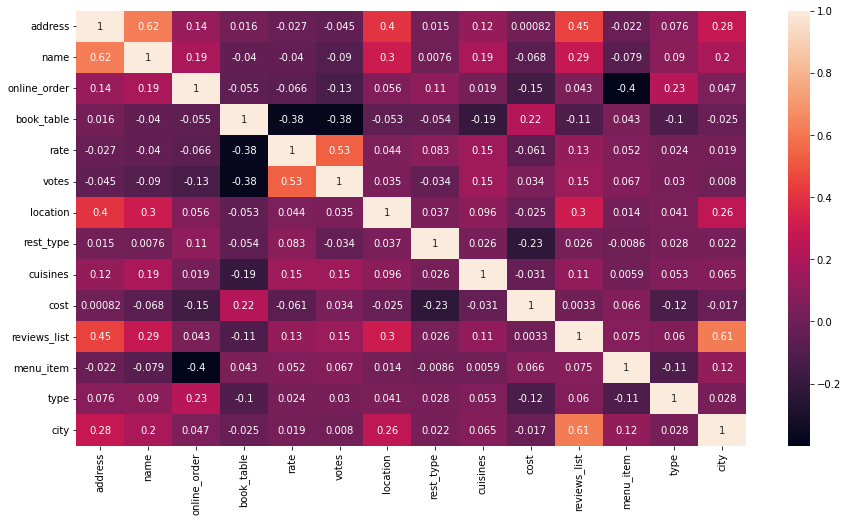

In [84]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

In [85]:
weight_for_votes = 0.6
weight_for_rating = 0.4

# Calculate the combined metric using weighted averages
weighted_votes = zomato_en['votes'] * weight_for_votes
weighted_rating = zomato_en['rate'] * weight_for_rating
total_weight = weight_for_votes + weight_for_rating
success_metric = (weighted_votes + weighted_rating) / total_weight
zomato_en['success_metric'] = success_metric

In [86]:
print(zomato_en.head(10))
print(zomato_en['success_metric'].max())
print(zomato_en['success_metric'].min())

   address  name  online_order  book_table  rate  votes  location  rest_type   
0        0     0             0           0   4.1    775         0          0  \
1        1     1             0           1   4.1    787         0          0   
2        2     2             0           1   3.8    918         0          1   
3        3     3             1           1   3.7     88         0          2   
4        4     4             1           1   3.8    166         1          0   
5        5     5             0           1   3.8    286         1          0   
6        6     6             1           1   3.6      8         2          0   
7        7     7             0           0   4.6   2556         0          3   
8        8     8             0           1   4.0    324         0          4   
9        9     9             0           1   4.2    504         0          4   

   cuisines   cost  reviews_list  menu_item  type  city  success_metric  
0         0  800.0             0          0  

In [87]:
success_metric = zomato_en['success_metric']
scaler = StandardScaler()
scaler.fit(success_metric.values.reshape(-1, 1))
success_metric = scaler.transform(success_metric.values.reshape(-1, 1))
zomato_en['success_metric'] = success_metric

In [88]:
print(zomato_en.head(10))
print(zomato_en['success_metric'].max())
print(zomato_en['success_metric'].min())
std_deviation = zomato_en['success_metric'].std()
mean_value = zomato_en['success_metric'].mean()
percentage_value = -1 * ((-0.389858 * std_deviation) / mean_value) * 100
percentage_value1 = ((2.491533 * std_deviation) / mean_value) * 100

print("std_deviation",std_deviation,"mean_value",mean_value,"percentage_value",percentage_value, percentage_value1)

   address  name  online_order  book_table  rate  votes  location  rest_type   
0        0     0             0           0   4.1    775         0          0  \
1        1     1             0           1   4.1    787         0          0   
2        2     2             0           1   3.8    918         0          1   
3        3     3             1           1   3.7     88         0          2   
4        4     4             1           1   3.8    166         1          0   
5        5     5             0           1   3.8    286         1          0   
6        6     6             1           1   3.6      8         2          0   
7        7     7             0           0   4.6   2556         0          3   
8        8     8             0           1   4.0    324         0          4   
9        9     9             0           1   4.2    504         0          4   

   cuisines   cost  reviews_list  menu_item  type  city  success_metric  
0         0  800.0             0          0  

In [57]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,3,6,7,8,9]]
y = zomato_en['success_metric']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)
x_train.head()
y_train.head()

9792     0.000602
18964    0.002210
32151    0.000368
7739     0.015402
39367    0.029200
Name: success_metric, dtype: float64

In [25]:
print(x_train)

       online_order  book_table  location  rest_type  cuisines   cost
9792              0           1        30         13        50  300.0
18964             0           1        66          0        68  750.0
32151             0           1        80          2        79  200.0
7739              0           1        18          0      1429  750.0
39367             0           0        23          0       714  900.0
...             ...         ...       ...        ...       ...    ...
5051              1           1        39          0      1009  800.0
36532             0           0        28          0      1718    1.4
38364             1           1        17          7        26  350.0
17035             0           1        11          2        63  350.0
32381             0           1        24         25       178  400.0

[32989 rows x 6 columns]


In [26]:
print(y_train)

9792    -0.387638
18964   -0.357063
32151   -0.392112
7739    -0.106020
39367    0.156474
           ...   
5051    -0.247249
36532    3.340312
38364   -0.361489
17035   -0.382082
32381   -0.261608
Name: success_metric, Length: 32989, dtype: float64


In [28]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('r2Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))
print('MSE',mean_squared_error(y_test, y_pred))

r2Score 0.18808079503656983
MAE 0.4007883662667786
MSE 0.8399774271043827


In [29]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('r2Score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test, y_predict))
print('MSE',mean_squared_error(y_test, y_predict))

r2Score 0.9452373816996603
MAE 0.06562805996041633
MSE 0.059871602526158


In [30]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('r2Score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test, y_predict))
print('MSE',mean_squared_error(y_test, y_predict))

r2Score 0.9200235236755945
MAE 0.0892417159283852
MSE 0.0874377440405875


In [31]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 500)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('r2Score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test, y_predict))
print('MSE',mean_squared_error(y_test, y_predict))

r2Score 0.9911109798010748
MAE 0.02056299290670046
MSE 0.00971830604004812


In [32]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predict=gbr.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('r2Score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test, y_predict))
print('MSE',mean_squared_error(y_test, y_predict))

r2Score 0.5504339464900618
MAE 0.31059444153738053
MSE 0.491507544752175
